# Keras Syntax Basics

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

In [77]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [78]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


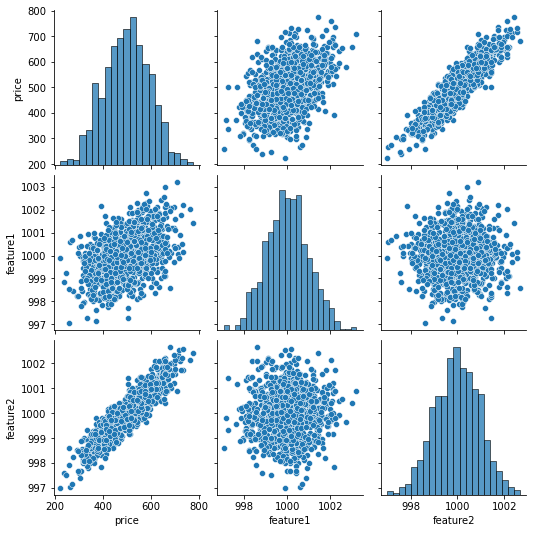

In [79]:
sns.pairplot(df)

# Test/Train Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [83]:
X_train.shape

(700, 2)

In [84]:
X_test.shape

(300, 2)

# Scaling the Data

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
scaler.fit(X_train)

MinMaxScaler()

In [88]:
X_train = scaler.transform(X_train)

In [89]:
X_test = scaler.transform(X_test)

In [90]:
X_train.max()

1.0

In [91]:
X_test.max()

1.0186515935232023

# Creating a Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
# Method1:
model = Sequential([Dense(4,activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])

In [94]:
# Method2:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [95]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256704.8906
Epoch 2/250
22/22 [==============================] - 0s 718us/step - loss: 256656.9219
Epoch 3/250
22/22 [==============================] - 0s 769us/step - loss: 256603.2656
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256542.3125
Epoch 5/250
22/22 [==============================] - 0s 830us/step - loss: 256473.1719
Epoch 6/250
22/22 [==============================] - 0s 895us/step - loss: 256393.7656
Epoch 7/250
22/22 [==============================] - 0s 997us/step - loss: 256303.0625
Epoch 8/250
22/22 [==============================] - 0s 937us/step - loss: 256199.9375
Epoch 9/250
22/22 [==============================] - 0s 951us/step - loss: 256081.0938
Epoch 10/250
22/22 [==============================] - 0s 892us/step - loss: 255945.9219
Epoch 11/250
22/22 [==============================] - 0s 761us/step - loss: 255792.2500
Epoch 12/250
22/22 [=========================

22/22 [==============================] - 0s 571us/step - loss: 19519.8965
Epoch 95/250
22/22 [==============================] - 0s 571us/step - loss: 16097.8359
Epoch 96/250
22/22 [==============================] - 0s 761us/step - loss: 12992.2910
Epoch 97/250
22/22 [==============================] - 0s 761us/step - loss: 10225.4014
Epoch 98/250
22/22 [==============================] - 0s 761us/step - loss: 7832.3379
Epoch 99/250
22/22 [==============================] - 0s 571us/step - loss: 5797.5557
Epoch 100/250
22/22 [==============================] - 0s 571us/step - loss: 4227.5898
Epoch 101/250
22/22 [==============================] - 0s 571us/step - loss: 3062.9075
Epoch 102/250
22/22 [==============================] - 0s 571us/step - loss: 2300.2029
Epoch 103/250
22/22 [==============================] - 0s 761us/step - loss: 1929.9004
Epoch 104/250
22/22 [==============================] - 0s 761us/step - loss: 1832.6398
Epoch 105/250
22/22 [==============================] - 0s 

22/22 [==============================] - 0s 571us/step - loss: 201.9336
Epoch 189/250
22/22 [==============================] - 0s 761us/step - loss: 193.7635
Epoch 190/250
22/22 [==============================] - 0s 571us/step - loss: 184.1205
Epoch 191/250
22/22 [==============================] - 0s 571us/step - loss: 175.5504
Epoch 192/250
22/22 [==============================] - 0s 761us/step - loss: 167.3896
Epoch 193/250
22/22 [==============================] - 0s 571us/step - loss: 159.4502
Epoch 194/250
22/22 [==============================] - 0s 761us/step - loss: 150.9420
Epoch 195/250
22/22 [==============================] - 0s 571us/step - loss: 144.6733
Epoch 196/250
22/22 [==============================] - 0s 571us/step - loss: 136.9695
Epoch 197/250
22/22 [==============================] - 0s 761us/step - loss: 130.4346
Epoch 198/250
22/22 [==============================] - 0s 761us/step - loss: 122.8827
Epoch 199/250
22/22 [==============================] - 0s 571us/step

# Evaluation

In [96]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

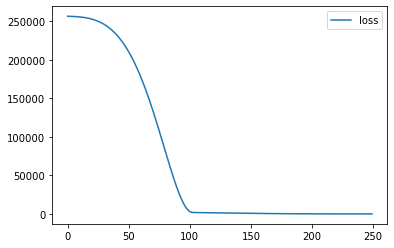

In [97]:
loss_df.plot()

In [98]:
model.evaluate(X_test,y_test,verbose=0)

25.12735366821289

In [99]:
model.evaluate(X_train,y_train,verbose=0)

23.80536460876465

# Further Evaluations

In [100]:
test_predictions = model.predict(X_test)

In [101]:
test_predictions

array([[405.6585 ],
       [623.59216],
       [592.16974],
       [572.4905 ],
       [367.30402],
       [579.33545],
       [515.51776],
       [459.29544],
       [549.538  ],
       [447.70358],
       [611.84906],
       [548.84625],
       [419.46866],
       [409.29483],
       [650.9808 ],
       [437.5479 ],
       [508.45447],
       [660.1561 ],
       [662.676  ],
       [565.56976],
       [334.8344 ],
       [445.1617 ],
       [383.0278 ],
       [379.15063],
       [566.74896],
       [610.8014 ],
       [532.6147 ],
       [428.17178],
       [655.6064 ],
       [414.3349 ],
       [442.84995],
       [485.3803 ],
       [438.71573],
       [681.936  ],
       [424.92728],
       [418.1483 ],
       [501.87592],
       [550.6126 ],
       [510.1537 ],
       [395.99005],
       [618.5936 ],
       [416.90442],
       [604.482  ],
       [446.08423],
       [502.22305],
       [581.54376],
       [668.7774 ],
       [490.54645],
       [318.95453],
       [485.70544],


In [102]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [103]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [104]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [105]:
pred_df.columns=['Test True Y','Model Predictions']

<AxesSubplot:xlabel='Test True Y', ylabel='Model Predictions'>

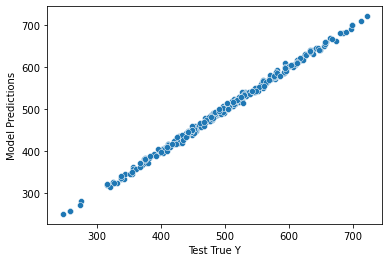

In [106]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [108]:
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

C:\Users\shirl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

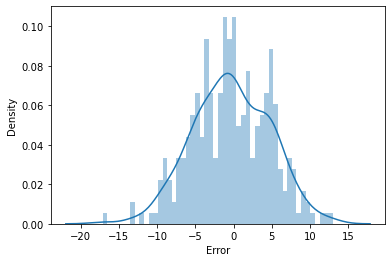

In [109]:
sns.distplot(pred_df['Error'],bins=50)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [39]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.2210100281946215

In [40]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [41]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

27.119356840854028

# Predicting on brand new data

In [42]:
new_gem = [[998,1000]]

In [44]:
new_gem = scaler.transform(new_gem)

In [45]:
model.predict(new_gem)

array([[420.78473]], dtype=float32)

# Saving and Loading a Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save('my_gem_model.h5')

In [48]:
later_model = load_model('my_gem_model.h5')

In [49]:
later_model.predict(new_gem)

array([[420.78473]], dtype=float32)